In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('heart.csv', sep=',')

In [7]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [17]:
df['Cholesterol'] = np.where(df['Cholesterol'] == 0, np.nan, df['Cholesterol'])

In [19]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


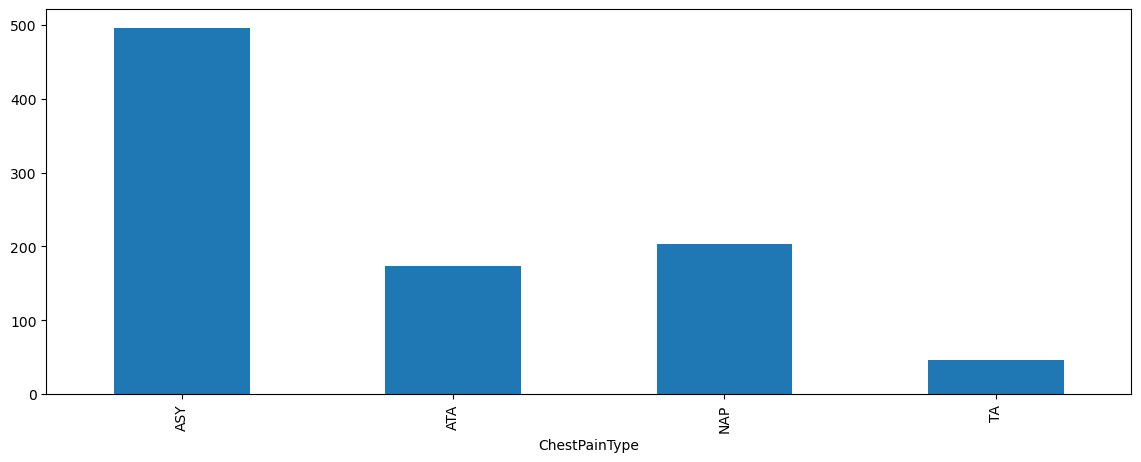

In [51]:
fig = plt.figure(figsize=(14,5))
df['ChestPainType'].value_counts().sort_index().plot.bar()
plt.show()

In [59]:
df.groupby('HeartDisease')[['Age', 'Cholesterol']].mean()

,Age,Cholesterol
HeartDisease,,
0,50.551220,238.769231
1,55.899606,251.061798


<Axes: xlabel='HeartDisease'>

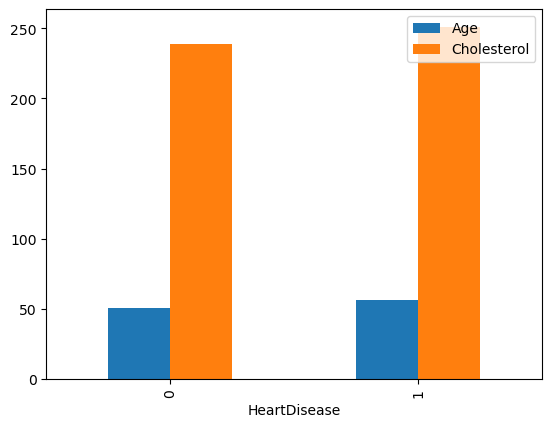

In [61]:
df.groupby('HeartDisease')[['Age', 'Cholesterol']].mean().plot.bar()

In [67]:
df['Cholesterol_bin'] = df['Cholesterol'] // 10 * 10
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_bin
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0,280.0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1,180.0
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0,280.0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1,210.0
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1,260.0
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1,190.0
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1,130.0
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1,230.0


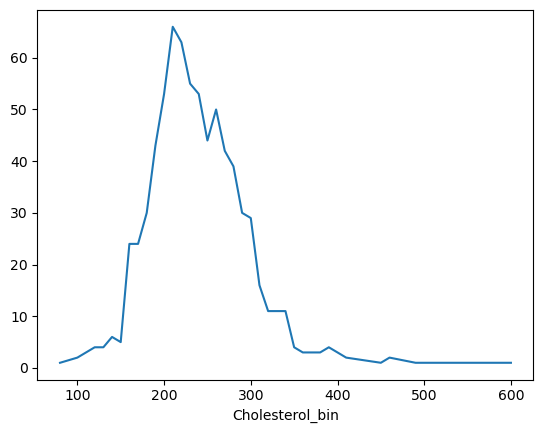

In [93]:
fig = plt.figure()
chart = df['Cholesterol_bin'].value_counts().sort_index().plot.line()

<Axes: ylabel='Frequency'>

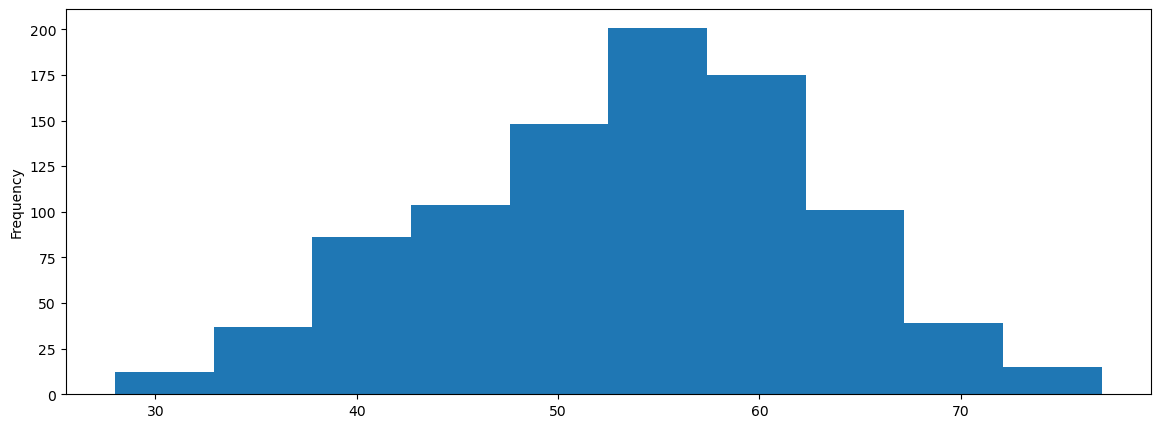

In [97]:
fig = plt.figure(figsize=(14,5))
df['Age'].plot.hist(bins=10)

<Axes: xlabel='Cholesterol', ylabel='Age'>

<Figure size 640x480 with 0 Axes>

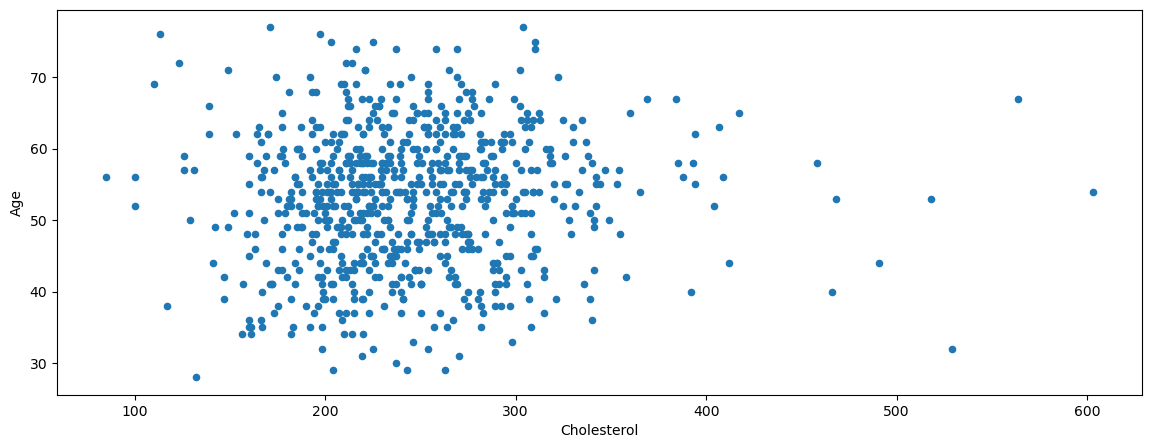

In [113]:
fig = plt.figure()
df.plot.scatter(x='Cholesterol',y='Age', figsize=(14,5))

<Axes: xlabel='Cholesterol', ylabel='Age'>

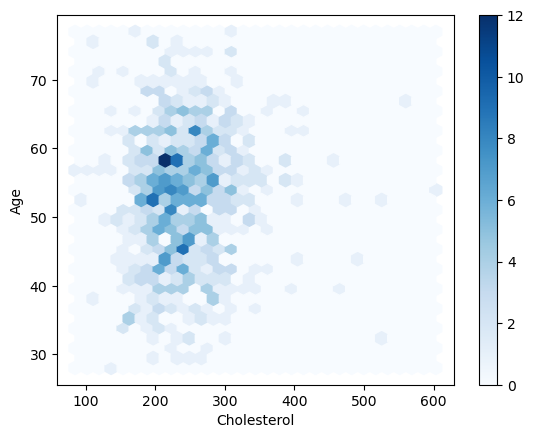

In [119]:
df.plot.hexbin(x='Cholesterol',y='Age',gridsize=30, cmap='Blues')